In [19]:
# from evasion import *
import gudhi as gd  
import pickle as pickle
from pylab import *
from sklearn.neighbors import KernelDensity
import seaborn as sns
import math
import numpy as np

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


# function to get solid cube coordinates
def getCubeCoordinates(space):
    z, y, x = np.shape(space)
    points = []
    for i in range(z):
        for j in range(y):
            for k in range(x):
                if space[i][j][k] == 0:
                    points.append([i, j, k])
    return np.array(points)

# Function to draw a cube
def draw_cube(ax, coords, size):
    """
    Draw a cube in 3D space.

    Parameters:
    - ax: Matplotlib 3D axis
    - size: Size of the cube
    """
    # Define cube vertices
    vertices = [
        [coords[0], coords[1], coords[2]],
        [coords[0] + size, coords[1], coords[2]],
        [coords[0] + size, coords[1] + size, coords[2]],
        [coords[0], coords[1] + size, coords[2]],
        [coords[0], coords[1], coords[2] + size],
        [coords[0] + size, coords[1], coords[2] + size],
        [coords[0] + size, coords[1] + size, coords[2] + size],
        [coords[0], coords[1] + size, coords[2] + size],
    ]

    # Define cube faces
    faces = [
        [vertices[0], vertices[1], vertices[5], vertices[4]],
        [vertices[7], vertices[6], vertices[2], vertices[3]],
        [vertices[0], vertices[4], vertices[7], vertices[3]],
        [vertices[1], vertices[5], vertices[6], vertices[2]],
        [vertices[4], vertices[5], vertices[6], vertices[7]],
        [vertices[0], vertices[1], vertices[2], vertices[3]]
    ]

    # Plot the cube
    ax.add_collection3d(Poly3DCollection(faces, facecolors='cyan', linewidths=1, edgecolors='r', alpha=0.5))

def plotCubes(space):
    spaceDim = np.shape(space)
    coordsList = getCubeCoordinates(space)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for coord in coordsList:
        draw_cube(ax, coord, size = 1)

    ax.set_xlim(0, spaceDim[0])
    ax.set_ylim(0, spaceDim[1])
    ax.set_zlim(0, spaceDim[2])
    ax.set_xlabel('T')
    ax.set_ylabel('Y')
    ax.set_zlabel('X')

def doesPathExists(space):
    spaceShape = np.shape(space)
    sensorSpace = ~space
    newSpace, tmin, tmax, t_inf = giveSpaceNoTimeDirection(space)
    filts = np.array([newSpace[u, v, z] for z in range(spaceShape[2]) for v in range(spaceShape[1]) for u in range(spaceShape[0])])
    
    cc_density_crater = gd.PeriodicCubicalComplex(
    dimensions = np.shape(space), 
    top_dimensional_cells = filts,
    periodic_dimensions = [1,0,0] # periodično v z dimenziji
    )
    persistence = cc_density_crater.persistence()
    
    for p in persistence:
        if p[0] == 1 and p[1][0] == tmin:
            return True
    return False

def getPersistance(space):
    spaceShape = np.shape(space)
    newSpace, tmin, tmax, t_inf = giveSpaceNoTimeDirection(space)
    filts = np.array([newSpace[u, v, z] for z in range(spaceShape[2]) for v in range(spaceShape[1]) for u in range(spaceShape[0])])
    
    cc_density_crater = gd.PeriodicCubicalComplex(
    dimensions = np.shape(space), 
    top_dimensional_cells = filts,
    periodic_dimensions = [1,0,0] # periodično v z dimenziji
    )
    persistence = cc_density_crater.persistence()
    
    return persistence, tmin, tmax, t_inf

def drawBarDiagram(space):
    jet = cm.get_cmap("hsv", 256)
    col = jet(np.linspace(0, 1, 4))
    
    persistence, tmin, tmax, t_inf = getPersistance(space)
    jet = cm.get_cmap("hsv", 256)
    col = jet(np.linspace(0, 1, 4))
    id = 0
    for p in persistence:
        print(p)
        c = p[0]
        start, stop = p[1]
        if stop == float("inf"):
            stop = t_inf + 1
        plt.hlines(id, start, stop, color = col[c], label = p)
        id += 1

def drawSensorSlices(space):
    kv = 0
    spaceLenght = len(space)
    while True:
        razlika = kv**2 - spaceLenght
        if razlika >= 0:
            break
        kv += 1
    n_cols = kv
    n_rows = spaceLenght//kv + spaceLenght%kv
    fig, axs = plt.subplots(n_rows, n_cols)
    imId = 0
    for i in range(n_rows):
        for j in range(n_cols):
            axs[i][j].axis("off")
            if imId < spaceLenght:
                axs[i][j].imshow(space[imId])
                # cbar = plt.colorbar(img, ax=axs[i][j])
            axs[i][j].set_xticklabels([])
            axs[i][j].set_yticklabels([])
            imId += 1
    plt.tight_layout()

In [3]:
# sensorPath = [[2,0], [2,1], [2,2], [1,2], [0,2], [0,1], [0,0], [1,0]]
# sensor = Sensor(sensorPath)
# space = sensor.getSensorArea((4,4))

#razpolovljen prostor
# space = np.zeros((15,15,15))
# space[5:8,:,:] = 1

# sensorList = [[[1,1],[1,3]], [[1,1],[4,1]]]
# sensorSpace = SensorsSpace((6,6), sensorList)
# space = sensorSpace.createSpace()


#ravna pot
# spaceShape = (8,6,6)
# space = np.ones(spaceShape, dtype=bool)
# space[:4,2,2] = False
# space[2:,3,4] = False

# # potovanje v času
spaceShape = (6,6,6)
space = np.ones(spaceShape, dtype=bool)
space[0,0,1] = 0
space[1,[0,2,3,4],1] = 0
space[2,[0,2,4],1] = 0
space[3,[0,1,2,4],1] = 0
space[4,4,1] = 0
space[5,0:5,1] = 0



# drawBarDiagram(space)
print(doesPathExists(space))
# drawSensorSlices(space)
drawBarDiagram(space)
plotCubes(space)

NameError: name 'giveSpaceNoTimeDirection' is not defined

### Show persistance diagram

inf


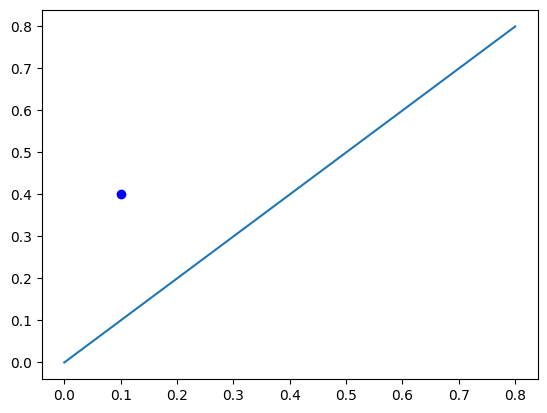

In [61]:
dim = 1
points = []
for p in persistence:
    if p[0] == dim:
        if p[1][1] == float("inf"):
            print("inf")
        points.append(p[1])

points = np.array(points)
x = np.linspace(0, np.max(points[:,0]))
plt.plot(points[:,0], points[:, 1], "bo")
plt.plot(x,x)
plt.show()

#### Show all slices

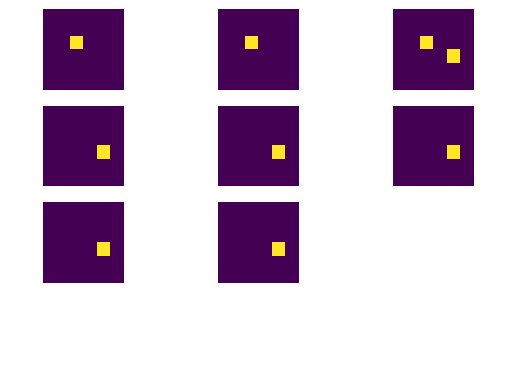

In [62]:

        
plt.show()

In [ ]:
%matplotlib widget
coordsList = getCubeCoordinates(space)
plotCubes(coordsList, spaceShape)
plt.show()


# NEW STUF

In [21]:
import numpy as np


class Sensor:
    def __init__(self, spaceDim, sensorPath):
        self.sensorPath = sensorPath  # [[x,y],[x,y],[x,y]]
        self.spaceDim = spaceDim
        self.timePeriod = len(sensorPath)

    def getSensorArea(self):
        """Returns coverage of sensor in spaceDim."""
        n_frames = len(self.sensorPath)
        space = np.zeros((n_frames, *self.spaceDim))

        for t in range(n_frames):
            y, x = self.sensorPath[t]
            space[t][y][x] = 1
            space[t][y][x + 1] = 1
            space[t][y + 1][x] = 1
            space[t][y + 1][x + 1] = 1
        return space

    def getCorners(self, t):
        t = t % self.timePeriod
        return [
            [self.sensorPath[t][0], self.sensorPath[t][1]],
            [self.sensorPath[t][0], self.sensorPath[t][1] + 1],
            [self.sensorPath[t][0] + 1, self.sensorPath[t][1]],
            [self.sensorPath[t][0] + 1, self.sensorPath[t][1] + 1]
        ]
# Sensor moves in straight lines
class SimpleSensor:
    def __init__(self, spaceDim, start, stop):  # start stop naj bosta [*, 0], [*, 0] ali [0, *], [0, *]
        self.start = np.array(start)
        self.stop = np.array(stop)
        self.spaceDim = spaceDim
        self.timePeriod = 2 * np.max(np.abs(self.start - self.stop))
        if self.timePeriod == 0:
            self.timePeriod = 1

    def getSensorArea(self):
        if self.start[0] == self.stop[0]:
            direction = np.array([0, 1]) * (((self.start[1] - self.stop[1]) < 0) * 2 - 1)
        elif self.start[1] == self.stop[1]:
            direction = np.array([1, 0]) * (((self.start[0] - self.stop[0]) < 0) * 2 - 1)
        space = np.zeros((self.timePeriod, *self.spaceDim))
        rangee = int(self.timePeriod / 2)
        for t in range(rangee + 1):
            y, x = self.start + t * direction
            space[t][y][x] = 1
            space[t][y][x + 1] = 1
            space[t][y + 1][x] = 1
            space[t][y + 1][x + 1] = 1
        for t in range(0, rangee - 1):
            y, x = self.stop - (t + 1) * direction
            space[rangee + 1 + t][y][x] = 1
            space[rangee + 1 + t][y][x + 1] = 1
            space[rangee + 1 + t][y + 1][x] = 1
            space[rangee + 1 + t][y + 1][x + 1] = 1
        return space

class SensorsSpace:
    """SensorsSpace takes a list of start and end points of sensors and creates one space."""
    def __init__(self, spaceDim, sensorStartStopList):
        self.sensorStartStopList = sensorStartStopList  # [[[startX,startY],[stopX,*]], [[*,*],[*,*]], [[*,*],[*,*]] ]
        self.spaceDim = spaceDim  # [*,*]
        self.sensors = []
        self.timePeriod = 0
        self.getCommonTimePeriod()

    def getCommonTimePeriod(self):
        periods = []
        for startStop in self.sensorStartStopList:
            sensor = SimpleSensor(self.spaceDim, startStop[0], startStop[1])
            self.sensors.append(sensor)
            periods.append(sensor.timePeriod)
        self.timePeriod = smallest_common_multiple(periods)

    def createSpace(self):
        space = np.zeros((self.timePeriod, *self.spaceDim))
        for sensor in self.sensors:
            n_roundtrips = int(self.timePeriod / sensor.timePeriod)
            space += np.tile(sensor.getSensorArea(), (n_roundtrips, 1, 1))
        return space > 0


def gcd(a, b):
    """Return greatest common divisor."""
    while b:
        a, b = b, a % b
    return a


def lcm(a, b):
    """Return lowest common multiple."""
    return abs(a * b) // gcd(a, b)


def smallest_common_multiple(numbers):
    """Return smallest common multiple of numbers."""
    result = 1
    for num in numbers:
        result = lcm(result, num)
    return result


def giveSpaceTimeDirection(space, step = 0.1):
    n_slices = np.shape(space)[0]
    sliceValues = np.arange(0.1, (n_slices+1)*step, step)
    tmin, tmax1 = sliceValues[[0, -1]]
    t_inf = tmax1*10
    sliceValues = np.reshape(sliceValues, (n_slices,1,1))
    newSpaceInf = space*t_inf
    newSpaceElse = (~space) * sliceValues
    newSpace = np.round(newSpaceInf + newSpaceElse, 2)
    return newSpace, tmin, tmax1, t_inf


def giveSpaceNoTimeDirection(space):
    return space*5 + 0.1, 0.1, 0.1, 5


def coveredSpace(sensors, period):
    space = []
    for t in range(period):
        locs = []
        for sensor in sensors:
            locs.extend(sensor.getCorners(t))
        space.append(locs)
    return space

In [22]:
from evasion import *

In [23]:
def createRandomSensorList(spaceDim, numSensors):
    sensorCoords = []
    for i in range(numSensors):
        startCoord = [np.random.randint(0, spaceDim[0]-1,), np.random.randint(0, spaceDim[1]-1,)]
        ax = np.random.randint(0, 2)
        endCoord = [1,1]
        endCoord[ax] = startCoord[ax]
        endCoord[(ax+1)%2] = np.random.randint(0, spaceDim[(ax+1)%2]-1,)
        sensorCoords.append([startCoord, endCoord])
    
    return sensorCoords

In [24]:
def giveSpaceTimeDirection2(space, step = 0.1):
    spaceShape = np.shape(space)
    
    spaceStep = step/(spaceShape[1]*spaceShape[2])
    spaceSliceValues = np.array([(i+1)*spaceStep for i in range(spaceShape[1]*spaceShape[2]-1, -1, -1)])
    spaceSliceValues = np.reshape(spaceSliceValues, (1,spaceShape[1], spaceShape[2]))

    n_slices = spaceShape[0]
    timeSliceValues = np.array([(i+1)*step for i in range(n_slices)])
    tmin, tmax1 = timeSliceValues[[0, -1]]
    t_inf = tmax1*10
    timeSliceValues = np.reshape(timeSliceValues, (n_slices,1,1))
    newSpaceInf = space*t_inf
    newSpaceElse = (~space) * (timeSliceValues + spaceSliceValues)
    newSpace = np.round(newSpaceInf + newSpaceElse, 4)
    return newSpace, tmin, tmax1, t_inf

def giveSpaceTimeDirection(space, step = 0.1):
    n_slices = np.shape(space)[0]
    sliceValues = np.array([(i+1)*step for i in range(n_slices)])
    tmin, tmax1 = sliceValues[[0, -1]]
    t_inf = tmax1*10
    sliceValues = np.reshape(sliceValues, (n_slices,1,1))
    newSpaceInf = space*t_inf
    newSpaceElse = (~space) * sliceValues
    newSpace = np.round(newSpaceInf + newSpaceElse, 2)
    return newSpace, tmin, tmax1, t_inf

# def giveSpaceTimeDirectionDelay(space, timeDelay = 0, spaceDelay, step = 0.1):
#     n_slices = np.shape(space)[0]
#     sliceValues = np.array([(i+1)*step for i in range(n_slices)])
#     sliceValues = np.append(sliceValues[timeDelay:], sliceValues[:timeDelay])
#     tmin, tmax1 = sliceValues[[0, -1]]
#     t_inf = tmax1*10
#     sliceValues = np.reshape(sliceValues, (n_slices,1,1))
#     newSpaceInf = space*t_inf
#     newSpaceElse = (~space) * sliceValues
#     newSpace = np.round(newSpaceInf + newSpaceElse, 2)
#     return newSpace, tmin, tmax1, t_inf

def giveSpaceTimeAndSpaceDirectionDelay(space, timeDelay = 0, spaceDelay = 0, timeStep = 0.1):
    spaceShape = np.shape(space)
    
    spaceStep = timeStep/(spaceShape[1]*spaceShape[2])
    spaceSliceValues = np.array([(i+1)*spaceStep for i in range(spaceShape[1]*spaceShape[2],)])
    spaceSliceValues = np.append(spaceSliceValues[spaceDelay:], spaceSliceValues[:spaceDelay])
    spaceSliceValues = np.reshape(spaceSliceValues, (1,spaceShape[1], spaceShape[2]))

    n_slices = spaceShape[0]
    timeSliceValues = np.array([(i+1)*timeStep for i in range(n_slices)])
    tmin, tmax1 = timeSliceValues[[0, -1]]
    timeSliceValues = np.append(timeSliceValues[timeDelay:], timeSliceValues[:timeDelay])
    
    t_inf = tmax1*10
    timeSliceValues = np.reshape(timeSliceValues, (n_slices,1,1))
    newSpaceInf = space*t_inf
    newSpaceElse = (~space) * (timeSliceValues + spaceSliceValues)
    newSpace = np.round(newSpaceInf + newSpaceElse, 4)
    return newSpace, tmin, tmax1, t_inf

def giveSpaceTimeLastSlice(space, timeDelay = 0, yDelay = 0, xDelay = 0, timeStep = 0.1, ):
    spaceShape = np.shape(space)

    addSpace = np.ones(spaceShape)*timeStep
    addSpace[timeDelay] = timeStep*spaceShape[0]

    addSpace[timeDelay][yDelay][xDelay] = (spaceShape[0]+1)*timeStep
    tmin = timeStep
    tmax1 = (spaceShape[0])*timeStep
    tmax2 = (spaceShape[0]+1)*timeStep
    t_inf = np.max(addSpace)*10
    
    newSpaceInf = space*t_inf
    newSpaceElse = (~space) * (addSpace)
    newSpace = np.round(newSpaceInf + newSpaceElse, 4)
    return newSpace, tmax1, tmax2, t_inf

def giveDimLastSlice(space, dim = 0, timeDelay = 0, yDelay = 0, xDelay = 0, timeStep = 0.1, ):
    spaceShape = np.shape(space)

    addSpace = np.ones(spaceShape)*timeStep
    addSpace[timeDelay] = timeStep*spaceShape[0]

    addSpace[timeDelay][yDelay][xDelay] = (spaceShape[0]+1)*timeStep
    tmin = timeStep
    tmax = np.max(addSpace)
    t_inf = np.max(addSpace)*10
    
    newSpaceInf = space*t_inf
    newSpaceElse = (~space) * (addSpace)
    newSpace = np.round(newSpaceInf + newSpaceElse, 4)
    return newSpace, tmin, tmax, t_inf

In [25]:
def getCoordsFromId(spaceDim, id):
    z = id // (spaceDim[1]*spaceDim[2])
    v = (id - z * spaceDim[1]*spaceDim[2]) // spaceDim[2]
    u = id - z * spaceDim[1]*spaceDim[2] - v * spaceDim[2]
    return [u, v, z]

In [26]:
from skimage import measure

def computeIdOfFinalCubeInLoop(newSpace, tmax1, tmax2, t_inf): # basicaly does path exists
    spaceShape = np.shape(newSpace)
    coords = np.array([[u, v, z] for z in range(spaceShape[2]) for v in range(spaceShape[1]) for u in range(spaceShape[0])]) 
    filts = np.array([newSpace[u, v, z] for z in range(spaceShape[2]) for v in range(spaceShape[1]) for u in range(spaceShape[0])])
        
    cc_density_crater = gd.PeriodicCubicalComplex(
        dimensions = np.shape(newSpace),
        vertices = filts, # top_dimensional_cells esm zamenju z vertices ker... je delal...?
        periodic_dimensions = [1,0,0] # periodično v z dimenziji
        )
    persistence = cc_density_crater.persistence() # izračunaj persistenco
    zadnjiCube = cc_density_crater.vertices_of_persistence_pairs() # vrne pare cubov (birth, death) posameznih komplexov....
    listOfCubeCoords = []
    listOfCubeIds = []
    for p in persistence:
        # print(p)
        if p[0] == 1 and (p[1][1] == float("inf") and p[1][0] < t_inf):
            listOfCubeIds.append(zadnjiCube[1][1][0])
            listOfCubeCoords.append(coords[zadnjiCube[1][1][0]])

        elif p[0]==1 and (tmax1 <= p[1][0] <= tmax2) and  int(p[1][1]) == int(t_inf):
            listOfCubeIds.append(zadnjiCube[0][1][0][0])
            listOfCubeCoords.append(coords[zadnjiCube[0][1][0][0]])
    return [listOfCubeIds, listOfCubeCoords]

def getAllIds(space):
    spaceShape = np.shape(space)
    ids = []
    coords = []
    for t in range(spaceShape[0]):
        print("time: ", t)
        for s in range(spaceShape[1]*spaceShape[2]):
            newSpace, tmin, tmax, t_inf = giveSpaceTimeAndSpaceDirectionDelay(space, t, s)
            listOfCubeIds, listOfCubeCoords = computeIdOfFinalCubeInLoop(newSpace, t_inf)
            if len(listOfCubeIds) == 0:
                return [[], []]
            for iii in range(len(listOfCubeIds)):
                if listOfCubeIds[iii] not in ids:
                    ids.append(listOfCubeIds[iii])
                    coords.append(listOfCubeCoords[iii])
    return np.array(ids), np.array(coords)

def getAllIds3(space):
    spaceShape = np.shape(space)
    ids = []
    coords = []
    for t in range(spaceShape[0]):
        print("time: ", t)
        for y in range(spaceShape[1]):
            for x in range(spaceShape[2]):
                if space[t, y, x] == 1:
                    continue
                newSpace, tmax1, tmax2, t_inf = giveSpaceTimeLastSlice(space, t, y, x)
                listOfCubeIds, listOfCubeCoords = computeIdOfFinalCubeInLoop(newSpace, tmax1, tmax2, t_inf)
                if len(listOfCubeIds) == 0:
                    return [[], []]
                for iii in range(len(listOfCubeIds)):
                    if listOfCubeIds[iii] not in ids:
                        ids.append(listOfCubeIds[iii])
                        coords.append(listOfCubeCoords[iii])
    return np.array(ids), np.array(coords)

def getAllIds4(space, rand = False):
    spaceShape = np.shape(space)
    ids = []
    coords = []
    newSpace, tmax1, tmax2, t_inf = giveSpaceTimeLastSlice(space)
    listOfCubeIds, listOfCubeCoords = computeIdOfFinalCubeInLoop(newSpace, tmax1, tmax2, t_inf)
    if len(listOfCubeIds) == 0:
        return np.array(ids), np.array(coords)
    spaceModulated = space.copy()
    idCount = 0

    ycoords = np.arange(0, spaceShape[1])
    xcoords = np.arange(0, spaceShape[2])
    for t in range(spaceShape[0]):
        print("time: ", t)
        if rand:
            ycoords = np.random.choice(np.arange(0, spaceShape[1]), size=spaceShape[1], replace=False)
            xcoords = np.random.choice(np.arange(0, spaceShape[2]), size=spaceShape[2], replace=False)
        for y in ycoords:
            for x in xcoords:
                if spaceModulated[t, y, x] == 1:
                    continue
                spaceModulated[t, y, x] = 1
                newSpace, tmax1, tmax2, t_inf = giveSpaceTimeLastSlice(spaceModulated, t, y, x)
                listOfCubeIds, listOfCubeCoords = computeIdOfFinalCubeInLoop(newSpace, tmax1, tmax2, t_inf)
                if len(listOfCubeIds) == 0:
                    ids.append(idCount)
                    coords.append([t, y, x])
                    spaceModulated[t, y, x] = 0
                idCount += 1

    return np.array(ids), np.array(coords)

def getAllPaths(space, rand=False):
    spaceShape = np.shape(space)
    finalCoords = []
    ids, cubeList = getAllIds3(space)
    for cube in cubeList:
        spaceModulated = space.copy()

        ycoords = np.arange(0, spaceShape[1])
        xcoords = np.arange(0, spaceShape[2])
        coords = []
        for tt in range(cube[0], spaceShape[0]+cube[0]):
            t = tt%spaceShape[0]
            print("time: ", t)
            if rand:
                ycoords = np.random.choice(np.arange(0, spaceShape[1]), size=spaceShape[1], replace=False)
                xcoords = np.random.choice(np.arange(0, spaceShape[2]), size=spaceShape[2], replace=False)
            for y in ycoords:
                for x in xcoords:
                    if spaceModulated[t, y, x] == 1:
                        continue
                    if t == cube[0] and y == cube[1] and x == cube[2]:
                        continue
                    spaceModulated[t, y, x] = 1
                    newSpace, tmin, tmax, t_inf = giveSpaceTimeLastSlice(spaceModulated, t, y, x)
                    listOfCubeIds, listOfCubeCoords = computeIdOfFinalCubeInLoop(newSpace, t_inf)
                    if len(listOfCubeIds) == 0:
                        if [t, y, x] == [0,0,0]:
                            print("cube: ", cube)
                        coords.append([t, y, x])
                        spaceModulated[t, y, x] = 0
            spaceModulated[cube[0], cube[1], cube[2]] = 1
            newSpace, tmin, tmax, t_inf = giveSpaceTimeLastSlice(spaceModulated, t, y, x)
            listOfCubeIds, listOfCubeCoords = computeIdOfFinalCubeInLoop(newSpace, t_inf)
            if len(listOfCubeIds) == 0:
                coords.append([cube[0], cube[1], cube[2]])
                spaceModulated[cube[0], cube[1], cube[2]] = 0
            
        for i in range(len(coords)):
            if coords[i] not in finalCoords:
                finalCoords.append(coords[i])
    return finalCoords

def findPath(space): # narobe pretvarja iz id v coordinate
    spaceShape = np.shape(space)
    ids, coords = getAllIds3(space)
    specialCoords = [getCoordsFromId(spaceShape, ids[i]) for i in range(len(ids))]
    specialCoords = np.array(specialCoords)
    return coords #(t, y, x)

### Testiranje

In [27]:
from animation import *

# Zadnji poskus

In [28]:
def find_islands(matrix):
    labeled_matrix, num_labels = measure.label(matrix, connectivity=1, return_num=True)
    return labeled_matrix, num_labels

def giveSpaceNoTimeDirection(space):
    newSpace = space.copy()
    newSpace = ~newSpace*0.1 + newSpace
    t_inf = 1
    return newSpace, t_inf

def doesPathExists(newSpace, t_inf):
    spaceShape = np.shape(newSpace)
    coords = np.array([[u, v, z] for z in range(spaceShape[2]) for v in range(spaceShape[1]) for u in range(spaceShape[0])]) 
    filts = np.array([newSpace[u, v, z] for z in range(spaceShape[2]) for v in range(spaceShape[1]) for u in range(spaceShape[0])])
        
    cc_density_crater = gd.PeriodicCubicalComplex(
        dimensions = np.shape(newSpace),
        vertices = filts, # top_dimensional_cells esm zamenju z vertices ker... je delal...?
        periodic_dimensions = [1,0,0] # periodično v z dimenziji
        )
    persistence = cc_density_crater.persistence() # izračunaj persistenco
    for p in persistence:
        # print(p)
        if p[0] == 1 and (p[1][1] == float("inf") and p[1][0] < t_inf):
            return True
    return False

def findOnePath(space, slice_num = 0):
    spaceShape = np.shape(space)
    newSpace, t_inf = giveSpaceNoTimeDirection(space)
    modulatedSpace = space.copy()
    labeled_matrix_hist = []
    wholePath = []
    for tt in range(slice_num, spaceShape[0] + slice_num):
        t = tt%spaceShape[0]
        labeled_matrix, num_labels = find_islands(~space[t])
        labeled_matrix_hist.append(labeled_matrix)
        for l in range(1, num_labels + 1):
            modulatedSpace[t][labeled_matrix == l] = 1
            path = doesPathExists(modulatedSpace, t_inf)
            if not path:
                modulatedSpace[t][labeled_matrix == l] = 0
                wholePath.append(l)

    cubeList = np.empty((0, 3))
    for t2 in range(spaceShape[0]):
        lmh = np.ravel(labeled_matrix_hist[t2])
        ids = np.where(lmh == wholePath[t2])[0]
        ycoords = ids//spaceShape[2]
        xcoords = ids%spaceShape[2]
        tcoords = np.ones(len(xcoords))*t2
        cubeList = np.append(cubeList, np.array([tcoords, ycoords, xcoords]).T, axis = 0)
    print(cubeList)
    return cubeList

def findAllPaths(space):
    newSpace, t_inf = giveSpaceNoTimeDirection(space)
    modulatedSpace = newSpace.copy()
    labeled_matrix_hist = []
    allImportantLs = []
    for tt in range(0, spaceShape[0]):
        labeled_matrix, num_labels = find_islands(~space[tt])
        labeled_matrix_hist.append(labeled_matrix)
        lls = np.array([i for i in range(1, num_labels+1)])
        importantLs = []
        for ord in range(num_labels):
            modulatedSpace = newSpace.copy()
            for l in np.append(lls[ord:], lls[:ord]):
                modulatedSpace[tt][labeled_matrix == l] = 1
                path = doesPathExists(modulatedSpace, t_inf)
                if not path:
                    modulatedSpace[tt][labeled_matrix == l] = 0
                    if l not in importantLs:
                        importantLs.append(l)
        allImportantLs.append(importantLs)


    # permutacije clustrov
    maxVrednosti = [len(allImportantLs[i]) for i in range(spaceShape[0])]
    stevec = [0 for i in range(spaceShape[0])]
    paths = []
    while True:
        modulatedSpace = newSpace.copy()
        for t in range(spaceShape[0]):
            modulatedSpace[t][labeled_matrix_hist[t] != allImportantLs[t][stevec[t]]] = 1
        path = doesPathExists(modulatedSpace, t_inf)
        if path:
            paths.append(stevec.copy())
        stevec[-1] += 1
        for s in range(spaceShape[0] - 1, 0, -1):
            if stevec[s] == maxVrednosti[s]:
                stevec[s] = 0
                stevec[s-1] += 1
        if stevec[0] == maxVrednosti[0]:
            break
        
            
    cubePathsList = []
    print(allImportantLs)
    print(paths)
    for p in range(len(paths)):
        cubeList = np.empty((0,3))
        for t2 in range(len(paths[p])):
            lmh = np.ravel(labeled_matrix_hist[t2])
            ids = np.where(lmh == (allImportantLs[t2][paths[p][t2]]))[0]
            ycoords = ids//spaceShape[2]
            xcoords = ids%spaceShape[2]
            tcoords = np.ones(len(xcoords))*t2
            cubeList = np.append(cubeList, np.array([tcoords, ycoords, xcoords]).T, axis = 0)
        cubePathsList.append(cubeList)
    if len(cubePathsList) == 0:
        print("Just time traveling, nothing to see here...???")
    return cubePathsList

def narrowPaths(space):
    spaceShape = np.shape(space)
    newSpace, t_inf = giveSpaceNoTimeDirection(space)
    path = doesPathExists(newSpace, t_inf)
    if not path:
        print("No path")
        return []
    cubePathsList = findAllPaths(space)
    narrowPaths = []
    for path in range(len(cubePathsList)):
        space = np.ones((spaceShape), dtype = bool)
        for cube in cubePathsList[path]:
            
            space[int(cube[0]), int(cube[1]), int(cube[2])] = 0
        ids, specialCoords = getAllIds4(space, True)
        narrowPaths.append(specialCoords)
    return narrowPaths
        


### Primeri

In [41]:
spaceShape = (7,10,9)
space = np.ones(spaceShape, dtype=bool)


#################### TEST 1
# space[:, 2:5, 2:4] = 0
# space[4:6, 5:6, 5] = 0

#########################
space[0,1,0] = 0
space[0,1,1] = 0
space[0,0,0] = 0
space[1,1:9,0] = 0
space[2,8,0:7] = 0
space[3,1:9,6] = 0
space[3,1,1:7] = 0
space[4,1:9,1] = 0
space[4:,8,1] = 0
space[6,1:8,1] = 0
space[6,1,0] = 0

# space[:, 4, 7] = 0
###############################

# space[0:4, 1, 2] = 0
# space[4, 1:5, 2] = 0
# space[0:5, 4, 2] = 0
# space[1, 4:6, 2] = 0
# space[1:, 6, 2] = 0
# space[4, 6:9, 2] = 0
# space[6, 0:6, 2] = 0
# space[6:, 1, 2] = 0


######################

# space[3, 1:6, 0] = 0
# space[3, 1:6, 6] = 0
# space[3, 1, 0:7] = 0
# space[3, 6, 0:7] = 0

#########################
# numSensors = 15
# spaceDim = (5, 15)
# sensors = createRandomSensorList(spaceDim, numSensors)
# sensorSpace = SensorsSpace(spaceDim, sensors)
# print(sensorSpace.timePeriod)
# # print(space)
# space = sensorSpace.createSpace()
# createVideo(space)
# print(np.shape(space))


# verzija 3 poišče "vse" možne poti če so "lepe", če niso lepe ti vrne le del poti...
# verzija 4 poišče samo eno pot. Ni nujno da je prava


# ids, specialCoords = getAllIds3(space)
# ids, specialCoords = getAllIds4(space, True)

# specialCoords = getAllPaths(space)

# paths = findAllPaths(space)

paths = narrowPaths(space)
print("Number of paths: ", len(paths))
# print(specialCoords)

[[1], [1], [1], [1], [1], [1], [1]]
[[0, 0, 0, 0, 0, 0, 0]]
time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
Number of paths:  1


In [43]:
specialCoords = paths[0]
print(specialCoords)

[[0 1 0]
 [1 4 0]
 [1 1 0]
 [1 3 0]
 [1 5 0]
 [1 8 0]
 [1 2 0]
 [1 6 0]
 [1 7 0]
 [2 8 0]
 [2 8 5]
 [2 8 2]
 [2 8 1]
 [2 8 3]
 [2 8 6]
 [2 8 4]
 [3 3 6]
 [3 7 6]
 [3 8 6]
 [3 1 4]
 [3 1 6]
 [3 1 3]
 [3 1 1]
 [3 1 5]
 [3 1 2]
 [3 5 6]
 [3 2 6]
 [3 6 6]
 [3 4 6]
 [4 4 1]
 [4 3 1]
 [4 6 1]
 [4 2 1]
 [4 8 1]
 [4 7 1]
 [4 1 1]
 [4 5 1]
 [5 8 1]
 [6 3 1]
 [6 8 1]
 [6 7 1]
 [6 2 1]
 [6 6 1]
 [6 4 1]
 [6 5 1]
 [6 1 0]
 [6 1 1]]


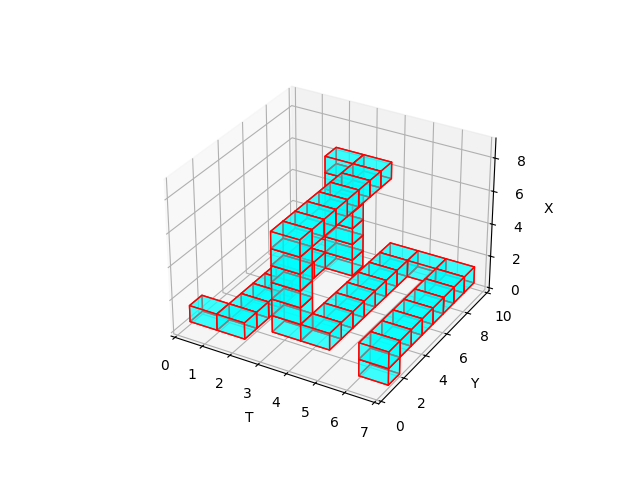

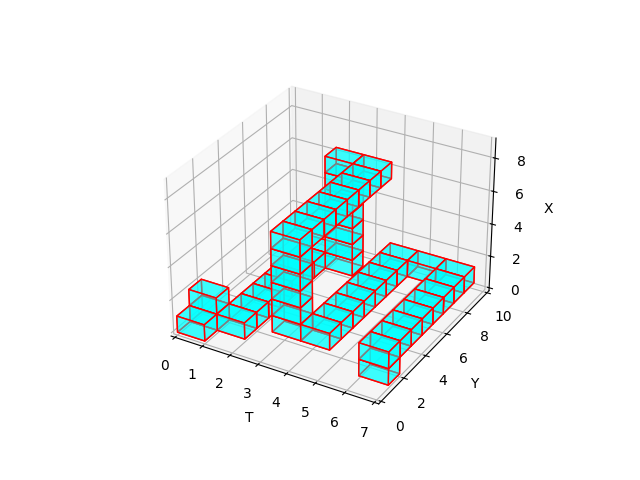

In [44]:
# interactive plot
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
spaceShape = np.shape(space)
# nariši najdeno pot, (Če je več poti lahko prikaže tudi dele drugih poti)
# če je več poti mogoče sploh ne najde cele poti...idk
if len(paths) > 0:
    for coord in specialCoords:
        draw_cube(ax, coord, size = 1)

ax.set_xlim(0, spaceShape[0])
ax.set_ylim(0, spaceShape[1])
ax.set_zlim(0, spaceShape[2])
ax.set_xlabel('T')
ax.set_ylabel('Y')
ax.set_zlabel('X')
plt.show()
# nariši celoten prostor
plotCubes(space)
plt.show()

# Za v skripto

Number of paths found:  2


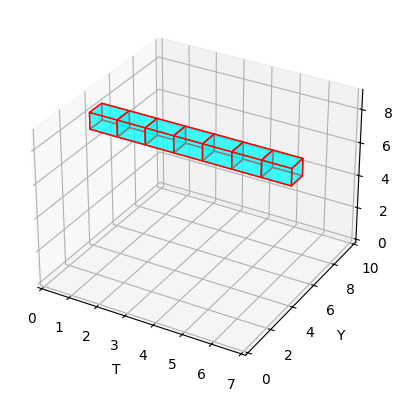

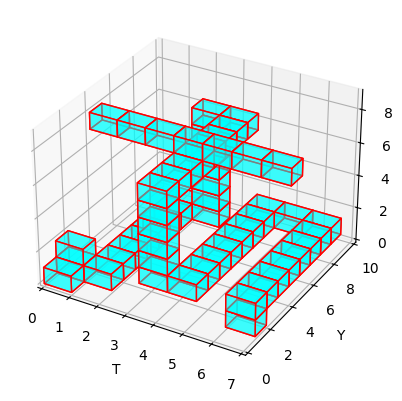

In [18]:
import gudhi as gd  
import pickle as pickle
from pylab import *
from sklearn.neighbors import KernelDensity
import seaborn as sns
import math
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
# Plotting stuff

# function to get solid cube coordinates
def getCubeCoordinates(space):
    z, y, x = np.shape(space)
    points = []
    for i in range(z):
        for j in range(y):
            for k in range(x):
                if space[i][j][k] == 0:
                    points.append([i, j, k])
    return np.array(points)

def draw_cube(ax, coords, size):
    """
    Draw a cube in 3D space.

    Parameters:
    - ax: Matplotlib 3D axis
    - size: Size of the cube
    """
    # Define cube vertices
    vertices = [
        [coords[0], coords[1], coords[2]],
        [coords[0] + size, coords[1], coords[2]],
        [coords[0] + size, coords[1] + size, coords[2]],
        [coords[0], coords[1] + size, coords[2]],
        [coords[0], coords[1], coords[2] + size],
        [coords[0] + size, coords[1], coords[2] + size],
        [coords[0] + size, coords[1] + size, coords[2] + size],
        [coords[0], coords[1] + size, coords[2] + size],
    ]

    # Define cube faces
    faces = [
        [vertices[0], vertices[1], vertices[5], vertices[4]],
        [vertices[7], vertices[6], vertices[2], vertices[3]],
        [vertices[0], vertices[4], vertices[7], vertices[3]],
        [vertices[1], vertices[5], vertices[6], vertices[2]],
        [vertices[4], vertices[5], vertices[6], vertices[7]],
        [vertices[0], vertices[1], vertices[2], vertices[3]]
    ]

    # Plot the cube
    ax.add_collection3d(Poly3DCollection(faces, facecolors='cyan', linewidths=1, edgecolors='r', alpha=0.5))

def plotCubes(space):
    """
    Draws cubes in 3D space, that are 0 in the input space.
    """
    spaceDim = np.shape(space)
    coordsList = getCubeCoordinates(space)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for coord in coordsList:
        draw_cube(ax, coord, size = 1)

    ax.set_xlim(0, spaceDim[0])
    ax.set_ylim(0, spaceDim[1])
    ax.set_zlim(0, spaceDim[2])
    ax.set_xlabel('T')
    ax.set_ylabel('Y')
    ax.set_zlabel('X')

def find_islands(matrix):
    """
    Finds islands of ones in a matrix of zeros and ones.
    """
    labeled_matrix, num_labels = measure.label(matrix, connectivity=1, return_num=True)
    return labeled_matrix, num_labels

def giveSpaceNoTimeDirection(space):
    """
    Instead of zeros and ones, the space is given as a matrix of 0.1 and 1.
    Needed for persistance.
    """
    newSpace = space.copy()
    newSpace = ~newSpace*0.1 + newSpace
    t_inf = 1
    return newSpace, t_inf

def giveSpaceTimeLastSlice(space, timeDelay = 0, yDelay = 0, xDelay = 0, timeStep = 0.1, ):
    """
    Changes space numbers from zero to 0.1 and 1 to bigger number t_inf. One time slice also get bigger value and one cube 
    in that time slice gets even bigger number. 0.1 < tmax1 < tmax2 < t_inf.
    """
    spaceShape = np.shape(space)

    addSpace = np.ones(spaceShape)*timeStep # all space 0 to 0.1
    addSpace[timeDelay] = timeStep*spaceShape[0] # the chosen time slice gets value tmax1

    addSpace[timeDelay][yDelay][xDelay] = (spaceShape[0]+1)*timeStep # the chosen cube in chosen time slice gets value tmax2
    tmin = timeStep
    tmax1 = (spaceShape[0])*timeStep
    tmax2 = (spaceShape[0]+1)*timeStep
    t_inf = np.max(addSpace)*10 # senzor values are the biggest
    
    # combine all together
    newSpaceInf = space*t_inf
    newSpaceElse = (~space) * (addSpace)
    newSpace = np.round(newSpaceInf + newSpaceElse, 4)
    return newSpace, tmax1, tmax2, t_inf

def computeIdOfFinalCubeInLoop(newSpace, tmax1, tmax2, t_inf): # basicaly does path exists
    """
    Computes coordinates and id (kinda useless) of last cube that created path.
    """

    spaceShape = np.shape(newSpace)
    coords = np.array([[u, v, z] for z in range(spaceShape[2]) for v in range(spaceShape[1]) for u in range(spaceShape[0])]) 
    filts = np.array([newSpace[u, v, z] for z in range(spaceShape[2]) for v in range(spaceShape[1]) for u in range(spaceShape[0])])
        
    cc_density_crater = gd.PeriodicCubicalComplex(
        dimensions = np.shape(newSpace),
        vertices = filts, # top_dimensional_cells esm zamenju z vertices ker... je delal...?
        periodic_dimensions = [1,0,0] # periodično v z dimenziji
        )
    persistence = cc_density_crater.persistence() # izračunaj persistenco
    zadnjiCube = cc_density_crater.vertices_of_persistence_pairs() # vrne pare cubov (birth, death) posameznih komplexov....
    listOfCubeCoords = []
    listOfCubeIds = []
    for p in persistence:
        # print(p)
        if p[0] == 1 and (p[1][1] == float("inf") and p[1][0] < t_inf):
            listOfCubeIds.append(zadnjiCube[1][1][0])
            listOfCubeCoords.append(coords[zadnjiCube[1][1][0]])

        elif p[0]==1 and (tmax1 <= p[1][0] <= tmax2) and  int(p[1][1]) == int(t_inf):
            listOfCubeIds.append(zadnjiCube[0][1][0][0])
            listOfCubeCoords.append(coords[zadnjiCube[0][1][0][0]])
    return [listOfCubeIds, listOfCubeCoords]

def doesPathExists(newSpace, t_inf):
    """
    Checks if path (loop) exists.
    """
    spaceShape = np.shape(newSpace)
    coords = np.array([[u, v, z] for z in range(spaceShape[2]) for v in range(spaceShape[1]) for u in range(spaceShape[0])]) 
    filts = np.array([newSpace[u, v, z] for z in range(spaceShape[2]) for v in range(spaceShape[1]) for u in range(spaceShape[0])])
        
    cc_density_crater = gd.PeriodicCubicalComplex(
        dimensions = np.shape(newSpace),
        vertices = filts, # top_dimensional_cells esm zamenju z vertices ker... je delal...?
        periodic_dimensions = [1,0,0] # periodično v z dimenziji
        )
    persistence = cc_density_crater.persistence() # izračunaj persistenco
    for p in persistence:
        # print(p)
        if p[0] == 1 and (p[1][1] == float("inf") and p[1][0] < t_inf):
            return True
    return False

def getAllIds4(space, rand = False):
    """
    In every time slice it deletes one cube and then checks if path exists. 
    """
    spaceShape = np.shape(space)
    ids = []
    coords = []
    newSpace, tmax1, tmax2, t_inf = giveSpaceTimeLastSlice(space)
    listOfCubeIds, listOfCubeCoords = computeIdOfFinalCubeInLoop(newSpace, tmax1, tmax2, t_inf)
    if len(listOfCubeIds) == 0:
        return np.array(ids), np.array(coords)
    spaceModulated = space.copy()
    idCount = 0

    ycoords = np.arange(0, spaceShape[1])
    xcoords = np.arange(0, spaceShape[2])
    for t in range(spaceShape[0]):
        if rand:
            ycoords = np.random.choice(np.arange(0, spaceShape[1]), size=spaceShape[1], replace=False)
            xcoords = np.random.choice(np.arange(0, spaceShape[2]), size=spaceShape[2], replace=False)
        for y in ycoords:
            for x in xcoords:
                if spaceModulated[t, y, x] == 1:
                    continue
                spaceModulated[t, y, x] = 1
                newSpace, tmax1, tmax2, t_inf = giveSpaceTimeLastSlice(spaceModulated, t, y, x)
                listOfCubeIds, listOfCubeCoords = computeIdOfFinalCubeInLoop(newSpace, tmax1, tmax2, t_inf)
                if len(listOfCubeIds) == 0:
                    ids.append(idCount)
                    coords.append([t, y, x])
                    spaceModulated[t, y, x] = 0
                idCount += 1

    return np.array(ids), np.array(coords)

def findAllPaths(space):
    """
    Finds all paths in space. You know.. creates islands removes islands checks if island was part of path, permutate through
    all islands and finds all paths... that kind of shjiet... Also ignores time traveling paths...hopefully....???
    """

    # Finds all important islands
    newSpace, t_inf = giveSpaceNoTimeDirection(space)
    modulatedSpace = newSpace.copy()
    labeled_matrix_hist = []
    allImportantLs = []
    for tt in range(0, spaceShape[0]):
        labeled_matrix, num_labels = find_islands(~space[tt])
        labeled_matrix_hist.append(labeled_matrix)
        lls = np.array([i for i in range(1, num_labels+1)])
        importantLs = []
        for ord in range(num_labels):
            modulatedSpace = newSpace.copy()
            for l in np.append(lls[ord:], lls[:ord]):
                modulatedSpace[tt][labeled_matrix == l] = 1
                path = doesPathExists(modulatedSpace, t_inf)
                if not path:
                    modulatedSpace[tt][labeled_matrix == l] = 0
                    if l not in importantLs:
                        importantLs.append(l)
        allImportantLs.append(importantLs)


    # Island permutation
    maxVrednosti = [len(allImportantLs[i]) for i in range(spaceShape[0])]
    stevec = [0 for i in range(spaceShape[0])]
    paths = []
    while True:
        modulatedSpace = newSpace.copy()
        for t in range(spaceShape[0]):
            modulatedSpace[t][labeled_matrix_hist[t] != allImportantLs[t][stevec[t]]] = 1
        path = doesPathExists(modulatedSpace, t_inf)
        if path:
            paths.append(stevec.copy())
        stevec[-1] += 1
        for s in range(spaceShape[0] - 1, 0, -1):
            if stevec[s] == maxVrednosti[s]:
                stevec[s] = 0
                stevec[s-1] += 1
        if stevec[0] == maxVrednosti[0]:
            break

    # convert list of island combinations to cube meshes
    cubePathsList = []
    for p in range(len(paths)):
        cubeList = np.empty((0,3))
        for t2 in range(len(paths[p])):
            lmh = np.ravel(labeled_matrix_hist[t2])
            ids = np.where(lmh == (allImportantLs[t2][paths[p][t2]]))[0]
            ycoords = ids//spaceShape[2]
            xcoords = ids%spaceShape[2]
            tcoords = np.ones(len(xcoords))*t2
            cubeList = np.append(cubeList, np.array([tcoords, ycoords, xcoords]).T, axis = 0)
        cubePathsList.append(cubeList)
    if len(cubePathsList) == 0:
        print("Just time traveling, nothing to see here...???")
    return cubePathsList

def narrowPaths(space):
    """
    Combines functions findAllPaths and getAllIds4.
    From findAllPaths gets all paths (that are pretty shit) and reduces them to 1D tube nice paths with getAllIds4.
    Returns all nice paths.
    """
    spaceShape = np.shape(space)
    newSpace, t_inf = giveSpaceNoTimeDirection(space)
    path = doesPathExists(newSpace, t_inf)
    if not path:
        print("No path")
        return []
    cubePathsList = findAllPaths(space)
    narrowPaths = []
    for path in range(len(cubePathsList)):
        space = np.ones((spaceShape), dtype = bool)
        for cube in cubePathsList[path]:
            
            space[int(cube[0]), int(cube[1]), int(cube[2])] = 0
        ids, specialCoords = getAllIds4(space, True)
        narrowPaths.append(specialCoords)
    return narrowPaths


if __name__ == "__main__":
    
    #Testni primeri
    # ################## Test 1 
    # spaceShape = (7,10,9)
    # space = np.ones(spaceShape, dtype=bool)
    # space[:, 2:5, 2:4] = 0
    # space[4:6, 5:6, 5] = 0

    ######################### TEST 2
    spaceShape = (7,10,9)
    space = np.ones(spaceShape, dtype=bool)
    space[0,1,0] = 0
    space[0,1,1] = 0
    space[0,0,0] = 0
    space[1,1:9,0] = 0
    space[2,8,0:7] = 0
    space[3,1:9,6] = 0
    space[3,1,1:7] = 0
    space[4,1:9,1] = 0
    space[4:,8,1] = 0
    space[6,1:8,1] = 0
    space[6,1,0] = 0

    space[:, 4, 7] = 0

    ############################### TEST 3
    # spaceShape = (8,10,9)
    # space = np.ones(spaceShape, dtype=bool)
    # space[0:4, 1, 2] = 0
    # space[4, 1:5, 2] = 0
    # space[0:5, 4, 2] = 0
    # space[1, 4:6, 2] = 0
    # space[1:, 6, 2] = 0
    # space[4, 6:9, 2] = 0
    # space[6, 0:6, 2] = 0
    # space[6:, 1, 2] = 0


    ###################### TEST 4
    # spaceShape = (7,10,9)
    # space = np.ones(spaceShape, dtype=bool)

    # space[3, 1:6, 0] = 0
    # space[3, 1:6, 6] = 0
    # space[3, 1, 0:7] = 0
    # space[3, 6, 0:7] = 0



    # compute all paths
    paths = narrowPaths(space)
    print("Number of paths found: ", len(paths))
    if len(paths) > 0:
        specialCoords = paths[0]

    # Prikaz poti
    # Prvi plot - najdena pot
    # Drugi plot - Celoten prostor

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    spaceShape = np.shape(space)
    # nariši najdeno pot, (Če je več poti lahko prikaže tudi dele drugih poti)
    # če je več poti mogoče sploh ne najde cele poti...idk
    if len(paths) > 0:
        for coord in specialCoords:
            draw_cube(ax, coord, size = 1)

    ax.set_xlim(0, spaceShape[0])
    ax.set_ylim(0, spaceShape[1])
    ax.set_zlim(0, spaceShape[2])
    ax.set_xlabel('T')
    ax.set_ylabel('Y')
    ax.set_zlabel('X')
    plt.show()
    # nariši celoten prostor
    plotCubes(space)
    plt.show()